In [1]:
import pandas as pd

# Load the data from the uploaded .gmd file
file_path = "gmat_gps.gmd"

# Read the data into a DataFrame (assuming space-separated values)
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Display the first few rows of the data to confirm correct loading
df.head()


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_245257/3329863186.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', names=columns)


,Timestamp,MeasurementType,SatelliteID,AdditionalID,X,Y,Z
0,30051.288889,GPS_PosVec,9014,800,-154.723365,1283.518421,6742.493360
1,30051.751030,GPS_PosVec,9014,800,-141.603371,-2538.877578,6382.983730
2,30051.823310,GPS_PosVec,9014,800,-3834.797533,-4116.272145,3930.728684
3,30051.892824,GPS_PosVec,9014,800,-6373.419203,-2108.756175,1458.577166
4,30051.931539,GPS_PosVec,9014,800,6489.744370,12.446983,2297.825270


In [2]:
import plotly.graph_objs as go
import pandas as pd

# Load the data from the uploaded file
file_path = "gmat_gps.gmd"
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Create a 3D Scatter plot without line connections between points
fig = go.Figure(data=[go.Scatter3d(
    x=df['X'], 
    y=df['Y'], 
    z=df['Z'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.8)
)])

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)'
    ),
    title='Interactive 3D Scatter Plot of Satellite Positions'
)

# Show the plot
fig.show()


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_245257/3557459910.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', names=columns)


In [10]:
import pandas as pd
import plotly.graph_objs as go

# Load the data from your .gmd file
file_path = "gmat_gps.gmd"  # Replace with the actual path to your .gmd file
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Create a 3D scatter plot without lines
fig = go.Figure(data=[go.Scatter3d(
    x=df['X'],
    y=df['Y'],
    z=df['Z'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.8)
)])

# Configure layout with axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='X (kilometers)',
        yaxis_title='Y (kilometers)',
        zaxis_title='Z (kilometers)'
    ),
    title='Interactive 3D Scatter Plot of Satellite Positions'
)

# Save the plot as an HTML file and open it in the default browser
fig.write_html("satellite_3d_plot.html", auto_open=True)


In [3]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load your .gmd file data
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Constants for the Earth's radius in meters (WGS-84 model)
EARTH_RADIUS = 6371e3  # 6371 km in meters

# Create a sphere representing the Earth
theta = np.linspace(0, np.pi, 50)  # Latitude range
phi = np.linspace(0, 2 * np.pi, 50)  # Longitude range
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to ECEF (X, Y, Z)
x_sphere = EARTH_RADIUS * np.sin(theta) * np.cos(phi)
y_sphere = EARTH_RADIUS * np.sin(theta) * np.sin(phi)
z_sphere = EARTH_RADIUS * np.cos(theta)

# Create the Earth sphere as a mesh
earth = go.Surface(
    x=x_sphere, 
    y=y_sphere, 
    z=z_sphere, 
    opacity=0.3, 
    colorscale='Blues',
    showscale=False,
    name='Earth'
)

# Create the 3D scatter plot of satellite positions
satellite = go.Scatter3d(
    x=df['X'],
    y=df['Y'],
    z=df['Z'],
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.8),
    name='Satellite Positions'
)

# Combine the sphere and satellite positions in one figure
fig = go.Figure(data=[earth, satellite])

# Set the layout with axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'  # Ensures the scaling is consistent across axes
    ),
    title='Satellite Positions with ECEF Earth Sphere'
)

# Save the plot as HTML and open it in the default browser
fig.write_html("ecef_satellite_plot.html", auto_open=True)


<>:8: SyntaxWarning:

invalid escape sequence '\s'

<>:8: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipykernel_245257/2905213340.py:8: SyntaxWarning:

invalid escape sequence '\s'



In [4]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load the satellite data
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Constants for the Earth's radius in meters (WGS-84 model)
EARTH_RADIUS = 6371e3  # Earth's mean radius in meters

# Normalize satellite points to fit the Earth’s surface radius
def normalize_to_surface(x, y, z, radius=EARTH_RADIUS):
    norm = np.sqrt(x**2 + y**2 + z**2)
    return (x / norm) * radius, (y / norm) * radius, (z / norm) * radius

df['X_normalized'], df['Y_normalized'], df['Z_normalized'] = normalize_to_surface(
    df['X'], df['Y'], df['Z']
)

# Create a sphere representing the Earth
theta = np.linspace(0, np.pi, 50)  # Latitude range
phi = np.linspace(0, 2 * np.pi, 50)  # Longitude range
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to ECEF (X, Y, Z)
x_sphere = EARTH_RADIUS * np.sin(theta) * np.cos(phi)
y_sphere = EARTH_RADIUS * np.sin(theta) * np.sin(phi)
z_sphere = EARTH_RADIUS * np.cos(theta)

# Create the Earth sphere as a mesh
earth = go.Surface(
    x=x_sphere, 
    y=y_sphere, 
    z=z_sphere, 
    opacity=0.3, 
    colorscale='Blues',
    showscale=False,
    name='Earth'
)

# Plot the normalized satellite positions as red markers on the sphere
satellite = go.Scatter3d(
    x=df['X_normalized'],
    y=df['Y_normalized'],
    z=df['Z_normalized'],
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.8),
    name='Satellite Positions'
)

# Combine the sphere and satellite positions in one figure
fig = go.Figure(data=[earth, satellite])

# Set layout and axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'  # Keep aspect ratio consistent
    ),
    title='Satellite Positions on ECEF Earth Sphere'
)

# Save the plot as HTML and open it in the default browser
fig.write_html("ecef_satellite_plot.html", auto_open=True)


<>:8: SyntaxWarning:

invalid escape sequence '\s'

<>:8: SyntaxWarning:

invalid escape sequence '\s'

/tmp/ipykernel_245257/4281588662.py:8: SyntaxWarning:

invalid escape sequence '\s'



In [15]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load the satellite data
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Constants for the Earth's radius in meters (WGS-84 model)
EARTH_RADIUS = 6371e3  # Earth's mean radius in meters

# Normalize satellite points to fit the Earth’s surface radius
def normalize_to_surface(x, y, z, radius=EARTH_RADIUS):
    norm = np.sqrt(x**2 + y**2 + z**2)
    return (x / norm) * radius, (y / norm) * radius, (z / norm) * radius

df['X_normalized'], df['Y_normalized'], df['Z_normalized'] = normalize_to_surface(
    df['X'], df['Y'], df['Z']
)

# Create a sphere representing the Earth
theta = np.linspace(0, np.pi, 50)  # Latitude range
phi = np.linspace(0, 2 * np.pi, 50)  # Longitude range
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to ECEF (X, Y, Z)
x_sphere = EARTH_RADIUS * np.sin(theta) * np.cos(phi)
y_sphere = EARTH_RADIUS * np.sin(theta) * np.sin(phi)
z_sphere = EARTH_RADIUS * np.cos(theta)

# Create the Earth sphere as a mesh
earth = go.Surface(
    x=x_sphere, 
    y=y_sphere, 
    z=z_sphere, 
    opacity=0.3, 
    colorscale='Blues',
    showscale=False,
    name='Earth'
)

# Create frames for animation: one frame for each timestamp
frames = [
    go.Frame(
        data=[
            go.Scatter3d(
                x=df.iloc[:i + 1]['X_normalized'], 
                y=df.iloc[:i + 1]['Y_normalized'], 
                z=df.iloc[:i + 1]['Z_normalized'],
                mode='markers',
                marker=dict(size=4, color='red', opacity=0.8)
            )
        ],
        name=f"Frame {i}"
    )
    for i in range(len(df))
]

# Create the initial plot layout with the Earth sphere
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Animated Satellite Positions on ECEF Earth Sphere',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play", method="animate", 
                          args=[None, dict(frame=dict(duration=500, redraw=True), 
                                           fromcurrent=True, 
                                           mode='immediate')])]
        )]
    ),
    frames=frames
)

# Save the animated plot as HTML and open it in the browser
fig.write_html("animated_ecef_satellite_plot.html", auto_open=True)


In [19]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np
from scipy.spatial import KDTree

# Load the satellite data
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Constants for the Earth's radius in meters (WGS-84 model)
EARTH_RADIUS = 6371e3  # Earth's mean radius in meters

# Normalize satellite points to fit the Earth’s surface radius
def normalize_to_surface(x, y, z, radius=EARTH_RADIUS):
    norm = np.sqrt(x**2 + y**2 + z**2)
    return (x / norm) * radius, (y / norm) * radius, (z / norm) * radius

df['X_normalized'], df['Y_normalized'], df['Z_normalized'] = normalize_to_surface(
    df['X'], df['Y'], df['Z']
)

# Use KDTree to group points based on proximity
points = df[['X_normalized', 'Y_normalized', 'Z_normalized']].values
tree = KDTree(points)

# Define a proximity threshold (in meters) to group points
threshold = 5000  # Example threshold of 5 km

# Group points based on proximity incrementally
groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        indices = tree.query_ball_point(point, r=threshold)
        visited.update(indices)
        groups.append(indices)

# Create frames for animation: points appear incrementally with each frame
frames = [
    go.Frame(
        data=[
            go.Scatter3d(
                x=df.iloc[np.hstack(groups[:i + 1])]['X_normalized'],
                y=df.iloc[np.hstack(groups[:i + 1])]['Y_normalized'],
                z=df.iloc[np.hstack(groups[:i + 1])]['Z_normalized'],
                mode='markers',
                marker=dict(size=4, color='red', opacity=0.8)
            )
        ],
        name=f"Group {i}"
    )
    for i in range(len(groups))
]

# Create the Earth sphere for reference
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

x_sphere = EARTH_RADIUS * np.sin(theta) * np.cos(phi)
y_sphere = EARTH_RADIUS * np.sin(theta) * np.sin(phi)
z_sphere = EARTH_RADIUS * np.cos(theta)

earth = go.Surface(
    x=x_sphere,
    y=y_sphere,
    z=z_sphere,
    opacity=0.3,
    colorscale='Blues',
    showscale=False,
    name='Earth'
)

# Create the plot with the Earth sphere
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Animated Satellite Positions Grouped by Proximity on ECEF Sphere',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play", method="animate", 
                          args=[None, dict(frame=dict(duration=500, redraw=True), 
                                           fromcurrent=True, 
                                           mode='immediate')])]
        )]
    ),
    frames=frames
)

# Save the plot as an HTML file and open it in the browser
fig.write_html("animated_ecef_satellite_proximity_plot.html", auto_open=True)

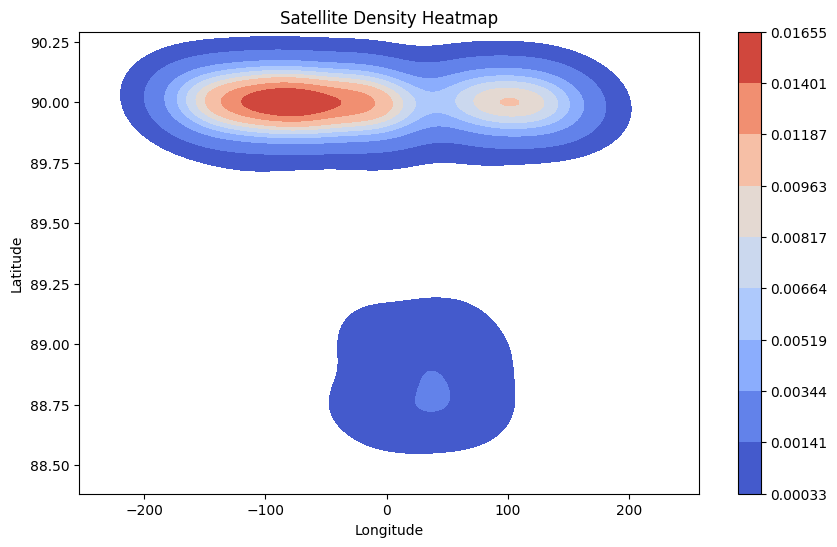

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert ECEF to latitude and longitude
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']), axis=1, result_type='expand'
)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], cmap='coolwarm', fill=True, cbar=True)
plt.title('Satellite Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


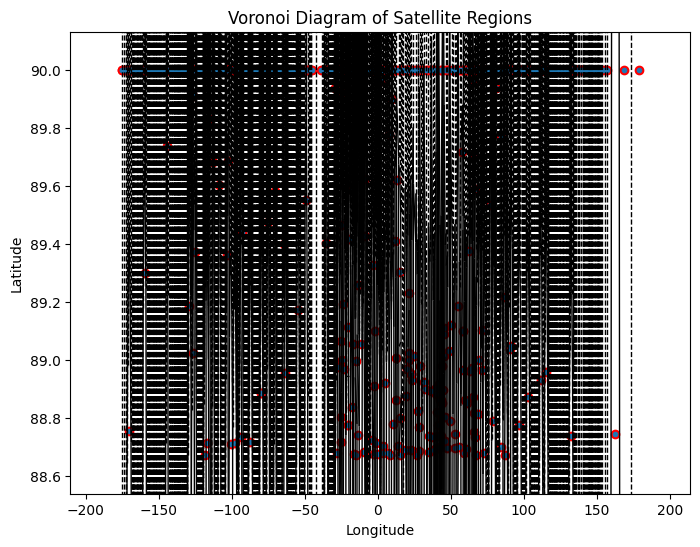

In [25]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate 2D projection of satellite positions
coordinates = df[['Longitude', 'Latitude']].values
vor = Voronoi(coordinates)

# Plot Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black')
plt.scatter(df['Longitude'], df['Latitude'], color='red')
plt.title('Voronoi Diagram of Satellite Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

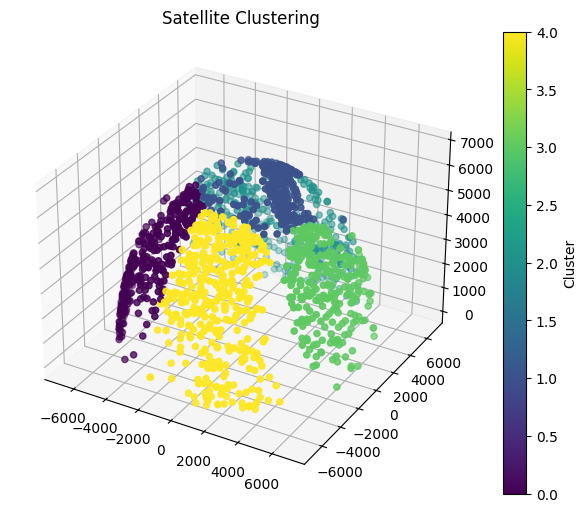

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(df[['X', 'Y', 'Z']])

# Plot clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Cluster'], cmap='viridis')
plt.title('Satellite Clustering')
plt.colorbar(scatter, label='Cluster')
plt.show()

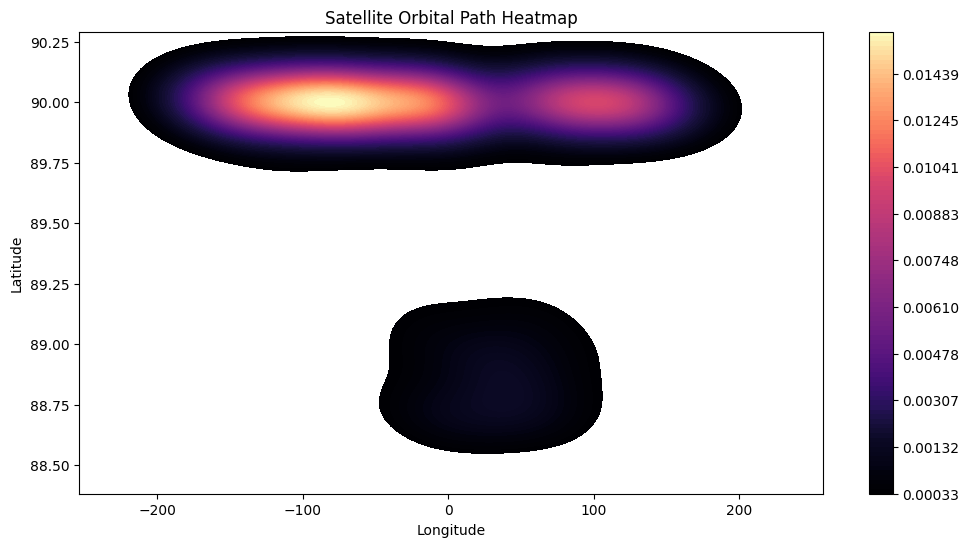

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert ECEF to latitude and longitude
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']), axis=1, result_type='expand'
)

# Plot the path heatmap
plt.figure(figsize=(12, 6))
sns.kdeplot(
    x=df['Longitude'], y=df['Latitude'], 
    cmap='magma', fill=True, cbar=True, 
    levels=100
)
plt.title('Satellite Orbital Path Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [32]:
import plotly.graph_objs as go

# Convert ECEF to geodetic coordinates (Latitude, Longitude, Altitude)
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']), axis=1, result_type='expand'
)

# Plot the orbital trail on a globe
fig = go.Figure(go.Scattergeo(
    lon=df['Longitude'],
    lat=df['Latitude'],
    mode='lines+markers',
    line=dict(width=2, color='red'),
    marker=dict(size=4, opacity=0.8),
))

# Customize globe layout
fig.update_geos(projection_type="orthographic", showcountries=True)
fig.update_layout(title="Polar Orbit Trail of Satellite", showlegend=False)
fig.show()

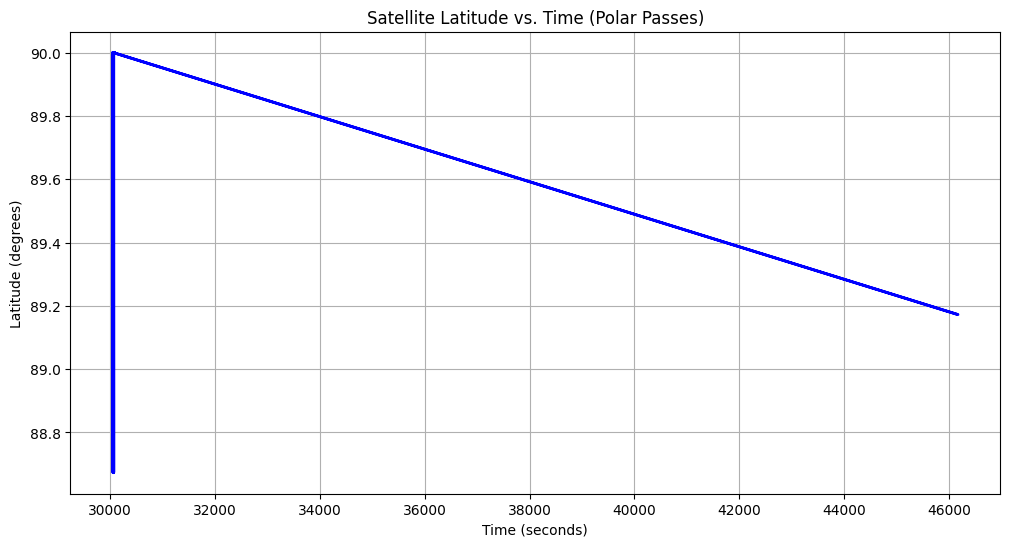

In [33]:
import matplotlib.pyplot as plt

# Plot latitude vs. time
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Latitude'], color='blue', linewidth=2)
plt.title('Satellite Latitude vs. Time (Polar Passes)')
plt.xlabel('Time (seconds)')
plt.ylabel('Latitude (degrees)')
plt.grid(True)
plt.show()

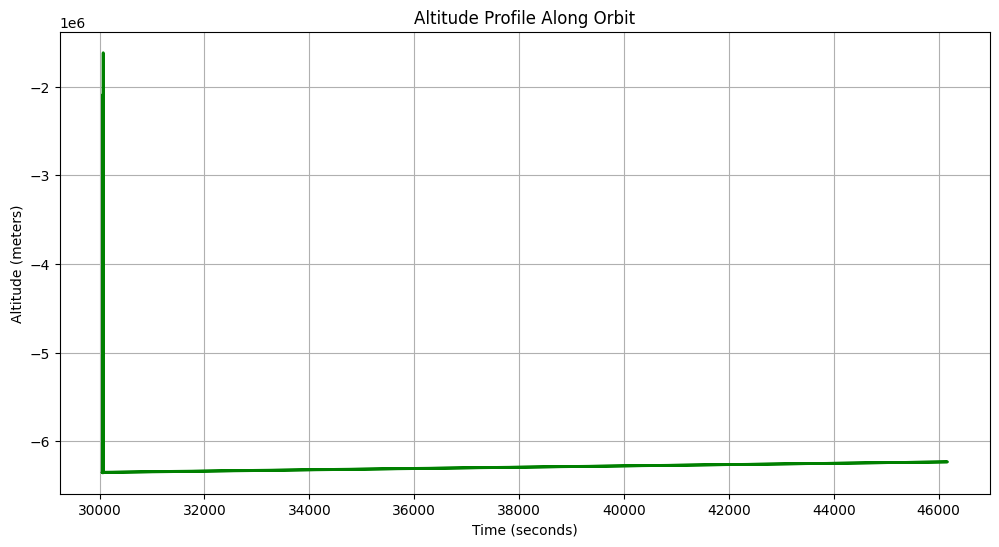

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Altitude'], color='green', linewidth=2)
plt.title('Altitude Profile Along Orbit')
plt.xlabel('Time (seconds)')
plt.ylabel('Altitude (meters)')
plt.grid(True)
plt.show()


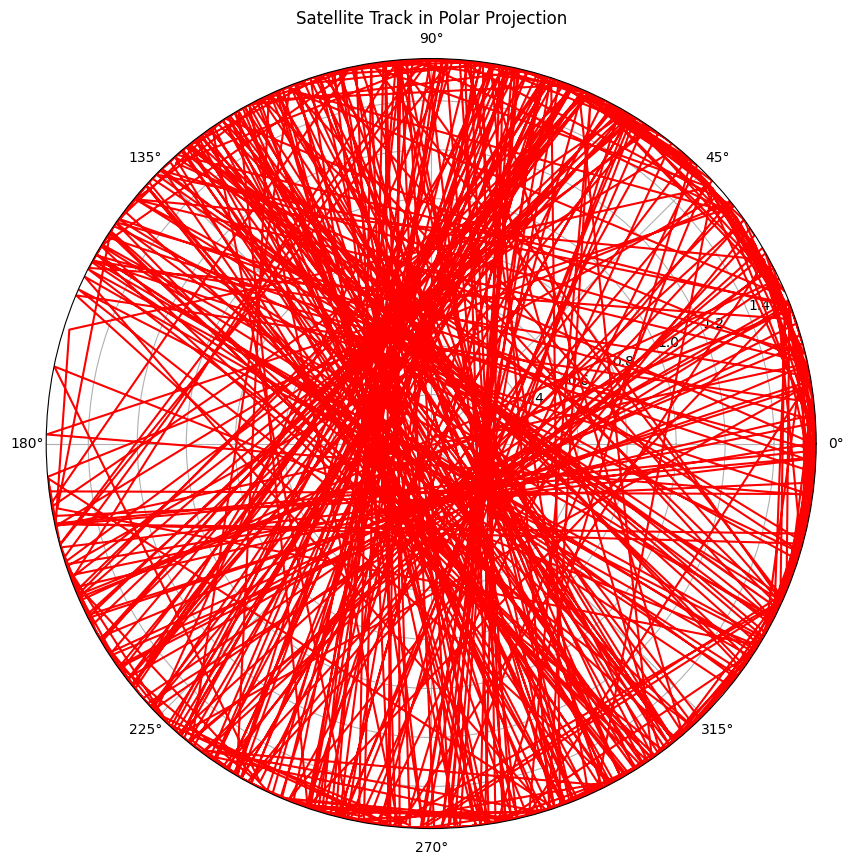

In [35]:
import matplotlib.pyplot as plt

# Create a polar projection
plt.figure(figsize=(10, 10))
plt.subplot(projection='polar')

# Plot the satellite track (convert lat/lon to radians)
lat_rad = np.deg2rad(df['Latitude'])
lon_rad = np.deg2rad(df['Longitude'])
plt.plot(lon_rad, lat_rad, color='red')

plt.title('Satellite Track in Polar Projection')
plt.show()

In [36]:
import plotly.express as px

# Create a time-lapse animation
fig = px.scatter_geo(
    df, 
    lon='Longitude', 
    lat='Latitude', 
    animation_frame='Timestamp',
    projection='orthographic',
    title='Satellite Polar Orbit Animation'
)
fig.show()

In [39]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your actual path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']), axis=1, result_type='expand'
)

# Step 3: Group points based on proximity in space-time
# Define proximity threshold in meters and time threshold in seconds
spatial_threshold = 10000  # 10 km
time_threshold = 300  # 5 minutes

# Sort data by timestamp for sequential grouping
df = df.sort_values('Timestamp').reset_index(drop=True)

# Use KDTree to group points spatially and temporally
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

# Group points based on both proximity and time
groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        # Find spatially close points
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        # Filter by time proximity
        spatial_and_temporal_indices = [
            idx for idx in spatial_indices
            if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold
        ]
        visited.update(spatial_and_temporal_indices)
        groups.append(spatial_and_temporal_indices)

# Step 4: Create frames for each group to visualize with links
frames = []
for group in groups:
    frame_data = go.Scatter3d(
        x=df.iloc[group]['X'],
        y=df.iloc[group]['Y'],
        z=df.iloc[group]['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2)
    )
    frames.append(go.Frame(data=[frame_data], name=f"Group {len(frames)}"))

# Step 5: Create the Earth sphere (ECEF reference globe)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to ECEF
earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere,
    y=y_sphere,
    z=z_sphere,
    opacity=0.3,
    colorscale='Blues',
    showscale=False,
    name='Earth'
)

# Step 6: Create the interactive plot with the Earth and animated frames
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Satellite Paths Grouped by Space-Time Proximity',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(label="Play", method="animate",
                          args=[None, dict(frame=dict(duration=1000, redraw=True),
                                           fromcurrent=True, mode='immediate')])]
        )]
    ),
    frames=frames
)

# Step 7: Save the plot as an HTML file and open it in the browser
fig.write_html("satellite_grouped_paths.html", auto_open=True)

In [41]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by proximity in space and time
spatial_threshold = 10000  # 10 km threshold
time_threshold = 300  # 5 minutes threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        temporal_indices = [idx for idx in spatial_indices if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create frames for animation
frames = [
    go.Frame(data=[
        go.Scatter3d(
            x=df.iloc[group]['X'],
            y=df.iloc[group]['Y'],
            z=df.iloc[group]['Z'],
            mode='lines+markers',
            marker=dict(size=4, color='red', opacity=0.8),
            line=dict(color='blue', width=2)
        )
    ], name=f"Group {i}") for i, group in enumerate(groups)
]

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Satellite Paths Grouped by Space-Time Proximity',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(
                label="Play", method="animate",
                args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
            )]
        )]
    ),
    frames=frames
)

# Step 7: Save the plot as an HTML file and open it
fig.write_html("satellite_grouped_paths.html", auto_open=True)

In [44]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by proximity in space and time
spatial_threshold = 10000  # 10 km threshold
time_threshold = 300  # 5 minutes threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        temporal_indices = [idx for idx in spatial_indices if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create frames that accumulate points incrementally
frames = []
accumulated_points = pd.DataFrame(columns=['X', 'Y', 'Z'])  # Empty DataFrame to accumulate points

for i, group in enumerate(groups):
    # Accumulate points from previous frames
    accumulated_points = pd.concat([accumulated_points, df.iloc[group]])

    # Create a frame with all accumulated points
    frame_data = go.Scatter3d(
        x=accumulated_points['X'],
        y=accumulated_points['Y'],
        z=accumulated_points['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2)
    )
    frames.append(go.Frame(data=[frame_data], name=f"Group {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Satellite Paths Grouped by Space-Time Proximity',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(
                label="Play", method="animate",
                args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
            )]
        )]
    ),
    frames=frames
)

# Step 7: Save the plot as an HTML file and open it
fig.write_html("satellite_grouped_paths.html", auto_open=True)

C:\Users\carlh\AppData\Local\Temp\ipykernel_3928\1469684817.py:45: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [48]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by proximity in space and time
spatial_threshold = 10000  # 10 km threshold
time_threshold = 300  # 5 minutes threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        # Find spatially close points
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        # Filter by time proximity
        temporal_indices = [
            idx for idx in spatial_indices
            if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold
        ]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create frames for each group separately (no cross-group linking)
frames = []
for i, group in enumerate(groups):
    group_data = df.iloc[group]
    
    # Create a frame showing only the points of the current group
    frame_data = go.Scatter3d(
        x=group_data['X'], y=group_data['Y'], z=group_data['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2),
        name=f"Group {i}"
    )
    frames.append(go.Frame(data=[frame_data], name=f"Group {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot with separate space-time groups
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Satellite Paths Grouped by Space-Time Proximity',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(
                label="Play", method="animate",
                args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
            )]
        )]
    ),
    frames=frames
)

# Step 7: Save the plot as an HTML file and open it
fig.write_html("satellite_grouped_paths.html", auto_open=True)

In [51]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by proximity in space and time
spatial_threshold = 10000  # 10 km threshold
time_threshold = 300  # 5 minutes threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        temporal_indices = [
            idx for idx in spatial_indices
            if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold
        ]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create frames that accumulate points incrementally
accumulated_data = pd.DataFrame(columns=['X', 'Y', 'Z'])
frames = []

for i, group in enumerate(groups):
    group_data = df.iloc[group]
    accumulated_data = pd.concat([accumulated_data, group_data])  # Accumulate points

    # Create a frame with accumulated points so far
    frame_data = go.Scatter3d(
        x=accumulated_data['X'],
        y=accumulated_data['Y'],
        z=accumulated_data['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2),
        name=f"Group {i}"
    )
    frames.append(go.Frame(data=[frame_data], name=f"Group {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot with cumulative frames
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Satellite Paths Grouped by Space-Time Proximity',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(
                label="Play", method="animate",
                args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
            )]
        )]
    ),
    frames=frames
)

# Step 7: Save the plot as an HTML file and open it
fig.write_html("satellite_grouped_paths.html", auto_open=True)

C:\Users\carlh\AppData\Local\Temp\ipykernel_3928\1502978505.py:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [53]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by space and time proximity
spatial_threshold = 10000  # 10 km threshold
time_threshold = 300  # 5 minutes threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

# Create space-time groups
groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        # Find spatially close points
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        # Filter points by temporal proximity
        temporal_indices = [
            idx for idx in spatial_indices
            if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold
        ]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create a frame for each group (only connect points within a group)
frames = []

for i, group in enumerate(groups):
    group_data = df.iloc[group]

    # Create a frame with lines + markers for each group separately
    frame_data = go.Scatter3d(
        x=group_data['X'], y=group_data['Y'], z=group_data['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2),
        name=f"Group {i}"
    )
    frames.append(go.Frame(data=[frame_data], name=f"Group {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot with multiple disjoint orbital arcs
fig = go.Figure(
    data=[earth],
    layout=go.Layout(
        scene=dict(
            xaxis_title='X (meters)',
            yaxis_title='Y (meters)',
            zaxis_title='Z (meters)',
            aspectmode='data'
        ),
        title='Disjoint Orbital Paths Grouped by Space-Time Proximity',
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[dict(
                label="Play", method="animate",
                args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
            )]
        )]
    ),
    frames=frames
)

# Step 7: Save the plot as an HTML file and open it
fig.write_html("disjoint_orbital_paths.html", auto_open=True)

In [56]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by space and time proximity
spatial_threshold = 10000  # 10 km threshold
time_threshold = 300  # 5 minutes threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        # Find spatially close points
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        # Filter points by temporal proximity
        temporal_indices = [
            idx for idx in spatial_indices
            if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) < time_threshold
        ]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create frames for each space-time group
frames = []

for i, group in enumerate(groups):
    group_data = df.iloc[group]

    # Create a frame showing only the points of the current group
    frame_data = go.Scatter3d(
        x=group_data['X'], y=group_data['Y'], z=group_data['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2),
        name=f"Group {i}"
    )
    frames.append(go.Frame(data=[frame_data], name=f"Group {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the layout with a slider for navigation
layout = go.Layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'
    ),
    title='Satellite Paths Grouped by Space-Time Proximity',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play", method="animate",
            args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
        )]
    )],
    sliders=[dict(
        steps=[dict(method='animate', args=[[f"Group {i}"], dict(mode='immediate')], label=f"Group {i}")
               for i in range(len(groups))],
        active=0,
        x=0.1, y=0, len=0.8
    )]
)

# Step 7: Create the figure and add frames
fig = go.Figure(data=[earth], layout=layout, frames=frames)

# Step 8: Save the plot as an HTML file and open it
fig.write_html("space_time_orbits_slider.html", auto_open=True)

In [61]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points into small space-time arcs
spatial_threshold = 1  # 1 km threshold (tight spatial grouping)
time_threshold =   # 30 seconds threshold (tight temporal grouping)

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i, point in enumerate(points):
    if i not in visited:
        # Find nearby points spatially
        spatial_indices = tree.query_ball_point(point, r=spatial_threshold)
        # Filter those points by temporal proximity
        temporal_indices = [
            idx for idx in spatial_indices
            if abs(df.iloc[idx]['Timestamp'] - df.iloc[i]['Timestamp']) <= time_threshold
        ]
        visited.update(temporal_indices)
        groups.append(temporal_indices)

# Step 4: Create frames for small arcs (1-6 points per arc)
frames = []

for i, group in enumerate(groups):
    group_data = df.iloc[group]

    # Create a frame showing the arc of the current group
    frame_data = go.Scatter3d(
        x=group_data['X'], y=group_data['Y'], z=group_data['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2),
        name=f"Arc {i}"
    )
    frames.append(go.Frame(data=[frame_data], name=f"Arc {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot with small arcs and slider
layout = go.Layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'
    ),
    title='Satellite Short Arcs Grouped by Space-Time Proximity',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play", method="animate",
            args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
        )]
    )],
    sliders=[dict(
        steps=[dict(method='animate', args=[[f"Arc {i}"], dict(mode='immediate')], label=f"Arc {i}")
               for i in range(len(groups))],
        active=0,
        x=0.1, y=0, len=0.8
    )]
)

# Step 7: Create the figure and add frames
fig = go.Figure(data=[earth], layout=layout, frames=frames)

# Step 8: Save the plot as an HTML file and open it
fig.write_html("short_arcs_slider.html", auto_open=True)

In [58]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points properly by BOTH space and time order
spatial_threshold = 1000  # 1 km spatial threshold
time_threshold = 30  # 30 seconds temporal threshold

df = df.sort_values('Timestamp').reset_index(drop=True)  # Ensure time ordering
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i in range(len(df)):
    if i not in visited:
        # Create a group starting with point 'i'
        group = [i]
        visited.add(i)

        # Expand the group based on spatial and time proximity
        for j in range(i + 1, len(df)):
            if j not in visited:
                # Check spatial proximity
                if np.linalg.norm(points[i] - points[j]) <= spatial_threshold:
                    # Check temporal proximity
                    if abs(df.iloc[j]['Timestamp'] - df.iloc[group[-1]]['Timestamp']) <= time_threshold:
                        group.append(j)
                        visited.add(j)

        groups.append(group)

# Step 4: Create frames for the proper space-time arcs
frames = []

for i, group in enumerate(groups):
    group_data = df.iloc[group]

    # Create a frame showing the arc for the current group
    frame_data = go.Scatter3d(
        x=group_data['X'], y=group_data['Y'], z=group_data['Z'],
        mode='lines+markers',
        marker=dict(size=4, color='red', opacity=0.8),
        line=dict(color='blue', width=2),
        name=f"Arc {i}"
    )
    frames.append(go.Frame(data=[frame_data], name=f"Arc {i}"))

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot with arcs and slider control
layout = go.Layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'
    ),
    title='Properly Grouped Satellite Arcs by Space-Time Proximity',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play", method="animate",
            args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
        )]
    )],
    sliders=[dict(
        steps=[dict(method='animate', args=[[f"Arc {i}"], dict(mode='immediate')], label=f"Arc {i}")
               for i in range(len(groups))],
        active=0,
        x=0.1, y=0, len=0.8
    )]
)

# Step 7: Create the figure and add frames
fig = go.Figure(data=[earth], layout=layout, frames=frames)

# Step 8: Save the plot as an HTML file and open it
fig.write_html("proper_arcs_slider.html", auto_open=True)

In [60]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Initialize the ECEF to Geodetic (WGS84) transformer
transformer = Transformer.from_crs("epsg:4978", "epsg:4326", always_xy=True)

# Convert ECEF coordinates to Geodetic (Latitude, Longitude, Altitude)
df[['Longitude', 'Latitude', 'Altitude']] = df.apply(
    lambda row: transformer.transform(row['X'], row['Y'], row['Z']),
    axis=1, result_type='expand'
)

# Step 3: Group points by both space and time proximity
spatial_threshold = 1000  # 1 km spatial threshold
time_threshold = 30  # 30 seconds temporal threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i in range(len(df)):
    if i not in visited:
        group = [i]
        visited.add(i)

        for j in range(i + 1, len(df)):
            if j not in visited:
                # Check both spatial and temporal proximity
                if np.linalg.norm(points[i] - points[j]) <= spatial_threshold:
                    if abs(df.iloc[j]['Timestamp'] - df.iloc[group[-1]]['Timestamp']) <= time_threshold:
                        group.append(j)
                        visited.add(j)

        groups.append(group)

# Step 4: Create frames for the grouped arcs (with NO cross-linkage)
frames = [
    go.Frame(
        data=[go.Scatter3d(
            x=df.iloc[group]['X'], y=df.iloc[group]['Y'], z=df.iloc[group]['Z'],
            mode='markers',  # No lines between points to avoid linkage
            marker=dict(size=4, color='red', opacity=0.8),
            name=f"Arc {i}"
        )],
        name=f"Arc {i}"
    )
    for i, group in enumerate(groups)
]

# Step 5: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create the interactive plot with no cross-linkage and live-like slider
layout = go.Layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'
    ),
    title='Satellite Paths Grouped by Space-Time Proximity (No Linkage Between Arcs)',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play", method="animate",
            args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
        )]
    )],
    sliders=[dict(
        steps=[dict(method='animate', args=[[f"Arc {i}"], dict(mode='immediate')], label=f"Arc {i}")
               for i in range(len(groups))],
        active=0,
        x=0.1, y=0, len=0.8
    )]
)

# Step 7: Create the figure and add frames
fig = go.Figure(data=[earth], layout=layout, frames=frames)

# Step 8: Save the plot as an HTML file and open it
fig.write_html("satellite_arcs_no_linkage.html", auto_open=True)


In [62]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your actual file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Convert X, Y, Z from kilometers to meters
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']] * 1000

# Step 3: Convert GPS timestamp to seconds (assuming GPS epoch as 1980-01-06)
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) * 86400  # Convert fractional days to seconds

# Step 4: Group points by space and time
spatial_threshold = 10000  # 10 km in meters
time_threshold = 30  # 30 seconds temporal threshold

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i in range(len(df)):
    if i not in visited:
        group = [i]
        visited.add(i)

        for j in range(i + 1, len(df)):
            if j not in visited:
                # Check spatial and temporal proximity
                if np.linalg.norm(points[i] - points[j]) <= spatial_threshold:
                    if abs(df.iloc[j]['Timestamp'] - df.iloc[group[-1]]['Timestamp']) <= time_threshold:
                        group.append(j)
                        visited.add(j)

        groups.append(group)

# Step 5: Create frames for the animation
frames = [
    go.Frame(
        data=[go.Scatter3d(
            x=df.iloc[group]['X'], y=df.iloc[group]['Y'], z=df.iloc[group]['Z'],
            mode='markers',  # No line to avoid cross-linkage between points
            marker=dict(size=4, color='red', opacity=0.8),
            name=f"Arc {i}"
        )],
        name=f"Arc {i}"
    )
    for i, group in enumerate(groups)
]

# Step 6: Create the Earth sphere (ECEF reference)
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.3, colorscale='Blues', showscale=False, name='Earth'
)

# Step 7: Create the interactive plot
layout = go.Layout(
    scene=dict(
        xaxis_title='X (meters)',
        yaxis_title='Y (meters)',
        zaxis_title='Z (meters)',
        aspectmode='data'
    ),
    title='Satellite Arcs with Disjoint Groups',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play", method="animate",
            args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
        )]
    )],
    sliders=[dict(
        steps=[dict(method='animate', args=[[f"Arc {i}"], dict(mode='immediate')], label=f"Arc {i}")
               for i in range(len(groups))],
        active=0,
        x=0.1, y=0, len=0.8
    )]
)

# Step 8: Add the Earth sphere and frames to the figure
fig = go.Figure(data=[earth], layout=layout, frames=frames)

# Step 9: Save and open the plot
fig.write_html("satellite_arcs_no_linkage.html", auto_open=True)

In [64]:
import pandas as pd
import numpy as np
from pyproj import Transformer
from scipy.spatial import KDTree
import plotly.graph_objs as go

# Step 1: Load the satellite data from the .gmd file
file_path = "gmat_gps.gmd"  # Replace with your actual file path
columns = ['Timestamp', 'MeasurementType', 'SatelliteID', 'AdditionalID', 'X', 'Y', 'Z']
df = pd.read_csv(file_path, sep='\s+', names=columns)

# Step 2: Convert X, Y, Z from kilometers to meters
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']] * 1000  # Ensure correct scaling to meters

# Step 3: Convert GPS timestamp to seconds (assume fractional days)
df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) * 86400  # Days to seconds

# Step 4: Group points by space-time proximity
spatial_threshold = 10000  # 10 km in meters
time_threshold = 30  # 30 seconds

df = df.sort_values('Timestamp').reset_index(drop=True)
points = df[['X', 'Y', 'Z']].values
tree = KDTree(points)

groups = []
visited = set()

for i in range(len(df)):
    if i not in visited:
        group = [i]
        visited.add(i)

        for j in range(i + 1, len(df)):
            if j not in visited:
                if np.linalg.norm(points[i] - points[j]) <= spatial_threshold:
                    if abs(df.iloc[j]['Timestamp'] - df.iloc[group[-1]]['Timestamp']) <= time_threshold:
                        group.append(j)
                        visited.add(j)

        groups.append(group)

# Step 5: Create Earth sphere
theta = np.linspace(0, np.pi, 50)
phi = np.linspace(0, 2 * np.pi, 50)
theta, phi = np.meshgrid(theta, phi)

earth_radius = 6371e3  # Earth's mean radius in meters
x_sphere = earth_radius * np.sin(theta) * np.cos(phi)
y_sphere = earth_radius * np.sin(theta) * np.sin(phi)
z_sphere = earth_radius * np.cos(theta)

earth = go.Surface(
    x=x_sphere, y=y_sphere, z=z_sphere,
    opacity=0.5, colorscale='Blues', showscale=False, name='Earth'
)

# Step 6: Create frames for animation
frames = [
    go.Frame(
        data=[go.Scatter3d(
            x=df.iloc[group]['X'], y=df.iloc[group]['Y'], z=df.iloc[group]['Z'],
            mode='markers',  # Only markers, no lines
            marker=dict(size=5, color='red', opacity=0.8),
            name=f"Arc {i}"
        )],
        name=f"Arc {i}"
    )
    for i, group in enumerate(groups)
]

# Step 7: Layout configuration with the Earth sphere visible at all times
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X (meters)', range=[-7e6, 7e6]),
        yaxis=dict(title='Y (meters)', range=[-7e6, 7e6]),
        zaxis=dict(title='Z (meters)', range=[-7e6, 7e6]),
        aspectmode='data'
    ),
    title='Satellite Arcs with Disjoint Groups on Earth Sphere',
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play", method="animate",
            args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True, mode='immediate')]
        )]
    )],
    sliders=[dict(
        steps=[dict(method='animate', args=[[f"Arc {i}"], dict(mode='immediate')], label=f"Arc {i}")
               for i in range(len(groups))],
        active=0,
        x=0.1, y=0, len=0.8
    )]
)

# Step 8: Create the figure with the Earth sphere and frames
fig = go.Figure(data=[earth], layout=layout, frames=frames)

# Step 9: Save and open the plot
fig.write_html("satellite_arcs_no_linkage_corrected.html", auto_open=True)